<a href="https://colab.research.google.com/github/studimeyt/speechRecognition/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Installing Libraries

In [ ]:
!pip install -U scikit-fuzzy
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=2330ace57a7f092ae1b39e49df81873e2f7924a82552e92b2c4b398eecb03a73
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.0 MB/s 


##Importing Libraries

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split


##Dataset

In [ ]:

csv_file = str("/content/drive/MyDrive/MinorProject/voice.csv/voice.csv")
df = pd.read_csv(csv_file)


##Checking Null values

In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

##Dataset

In [ ]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


###String to Int conversion

In [ ]:
df['gender_val'] = pd.factorize(df.label)[0]
#0 for male
#1 for female

In [ ]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,gender_val
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female,1


In [ ]:
max_value = df. max() 
print(max_value)

meanfreq         0.251124
sd               0.115273
median           0.261224
Q25              0.247347
Q75              0.273469
IQR              0.252225
skew            34.725453
kurt          1309.612887
sp.ent           0.981997
sfm              0.842936
mode                 0.28
centroid         0.251124
meanfun          0.237636
minfun           0.204082
maxfun           0.279114
meandom          2.957682
mindom           0.458984
maxdom          21.867188
dfrange          21.84375
modindx          0.932374
label                male
gender_val              1
dtype: object


In [ ]:
min_value = df. min()
print(min_value) 

meanfreq      0.039363
sd            0.018363
median        0.010975
Q25           0.000229
Q75           0.042946
IQR           0.014558
skew          0.141735
kurt          2.068455
sp.ent        0.738651
sfm           0.036876
mode               0.0
centroid      0.039363
meanfun       0.055565
minfun        0.009775
maxfun        0.103093
meandom       0.007812
mindom        0.004883
maxdom        0.007812
dfrange            0.0
modindx            0.0
label           female
gender_val           0
dtype: object


##Correlation Matrix (graph)

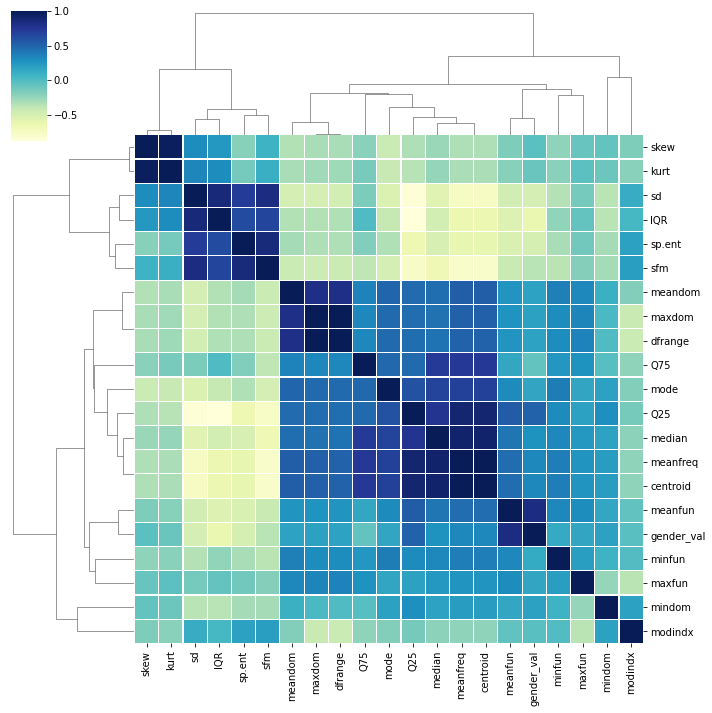

In [ ]:
corrmat=df.corr()
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

In [ ]:
corr = df.corr()['gender_val']
corr.sort_values()

IQR          -0.618916
sp.ent       -0.490552
sd           -0.479539
sfm          -0.357499
kurt         -0.087195
Q75          -0.066906
skew         -0.036627
modindx      -0.030801
minfun        0.136692
maxfun        0.166461
mode          0.171775
meandom       0.191067
dfrange       0.192213
mindom        0.194974
maxdom        0.195657
median        0.283919
meanfreq      0.337415
centroid      0.337415
Q25           0.511455
meanfun       0.833921
gender_val    1.000000
Name: gender_val, dtype: float64

## Filtering dataset

In [ ]:
new_df = df.filter(['Q25', 'meanfun','IQR','sp.ent','label','gender_val'])
new_df
#Q25 & meanfun have positive correlation
#IQR and sp.ent have negative correlation

,Q25,meanfun,IQR,sp.ent,label,gender_val
0,0.015071,0.084279,0.075122,0.893369,male,0
1,0.019414,0.107937,0.073252,0.892193,male,0
2,0.008701,0.098706,0.123207,0.846389,male,0
3,0.096582,0.088965,0.111374,0.963322,male,0
4,0.078720,0.106398,0.127325,0.971955,male,0
...,...,...,...,...,...,...
3163,0.049285,0.182790,0.151859,0.962934,female,1
3164,0.042718,0.188980,0.162193,0.960716,female,1
3165,0.033424,0.209918,0.190936,0.946854,female,1
3166,0.043508,0.172375,0.176435,0.950436,female,1


##Scaling values

In [ ]:
scaler = MinMaxScaler()
new_df[['Q25','meanfun','IQR','sp.ent']]=scaler.fit_transform(new_df[['Q25','meanfun','IQR','sp.ent']])

In [ ]:
new_df = new_df.round(3)
new_df
#rounding off min-max values to 3 decimal places

,Q25,meanfun,IQR,sp.ent,label,gender_val
0,0.060,0.158,0.255,0.636,male,0
1,0.078,0.288,0.247,0.631,male,0
2,0.034,0.237,0.457,0.443,male,0
3,0.390,0.183,0.407,0.923,male,0
4,0.318,0.279,0.474,0.959,male,0
...,...,...,...,...,...,...
3163,0.199,0.699,0.578,0.922,female,1
3164,0.172,0.733,0.621,0.913,female,1
3165,0.134,0.848,0.742,0.856,female,1
3166,0.175,0.642,0.681,0.870,female,1


In [ ]:
new_df.describe()

,Q25,meanfun,IQR,sp.ent,gender_val
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.567448,0.479164,0.293479,0.643025,0.500000
std,0.196990,0.177430,0.180010,0.184836,0.500079
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.449000,0.337000,0.118000,0.506000,0.000000
50%,0.567000,0.467000,0.335000,0.670000,0.500000
75%,0.711000,0.626000,0.419000,0.781000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
value_df = new_df.drop(columns= ['label','gender_val'])
value_df
#removing label coulumn

,Q25,meanfun,IQR,sp.ent
0,0.060,0.158,0.255,0.636
1,0.078,0.288,0.247,0.631
2,0.034,0.237,0.457,0.443
3,0.390,0.183,0.407,0.923
4,0.318,0.279,0.474,0.959
...,...,...,...,...
3163,0.199,0.699,0.578,0.922
3164,0.172,0.733,0.621,0.913
3165,0.134,0.848,0.742,0.856
3166,0.175,0.642,0.681,0.870


In [ ]:
x= value_df[['Q25','meanfun','IQR','sp.ent']].copy() 
y= new_df[['label']].copy()

##Decision Tree 

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(criterion='entropy')>

###Train-Test Splitting

In [ ]:
#split the dataset-80% to training and 20% to testing
x_train,x_test,y_train,y_test = train_test_split(value_df,new_df.gender_val,test_size=0.2,random_state=None)

###Decision Tree Model

In [ ]:
#Instantitate the decision tree model
dt = DecisionTreeClassifier(max_depth =4,criterion='entropy')

In [ ]:
#Build Model
modl = dt.fit(x_train,y_train)

In [ ]:
predictedData = modl.predict(x_test)
predictedData

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [ ]:
import graphviz
#for decision tree visualisation
#str_new_df = new_df.applymap(str)
#str_value_df = value_df.applymap(str)
#feature = ['Q25','meanfun','IQR','sp.ent']

In [ ]:
dot_data=tree.export_graphviz(dt,out_file=None,feature_names=['Q25','meanfun','IQR','sp.ent'],class_names=['male','female'],filled=True,rounded=True,special_characters=True)

###Decision Tree

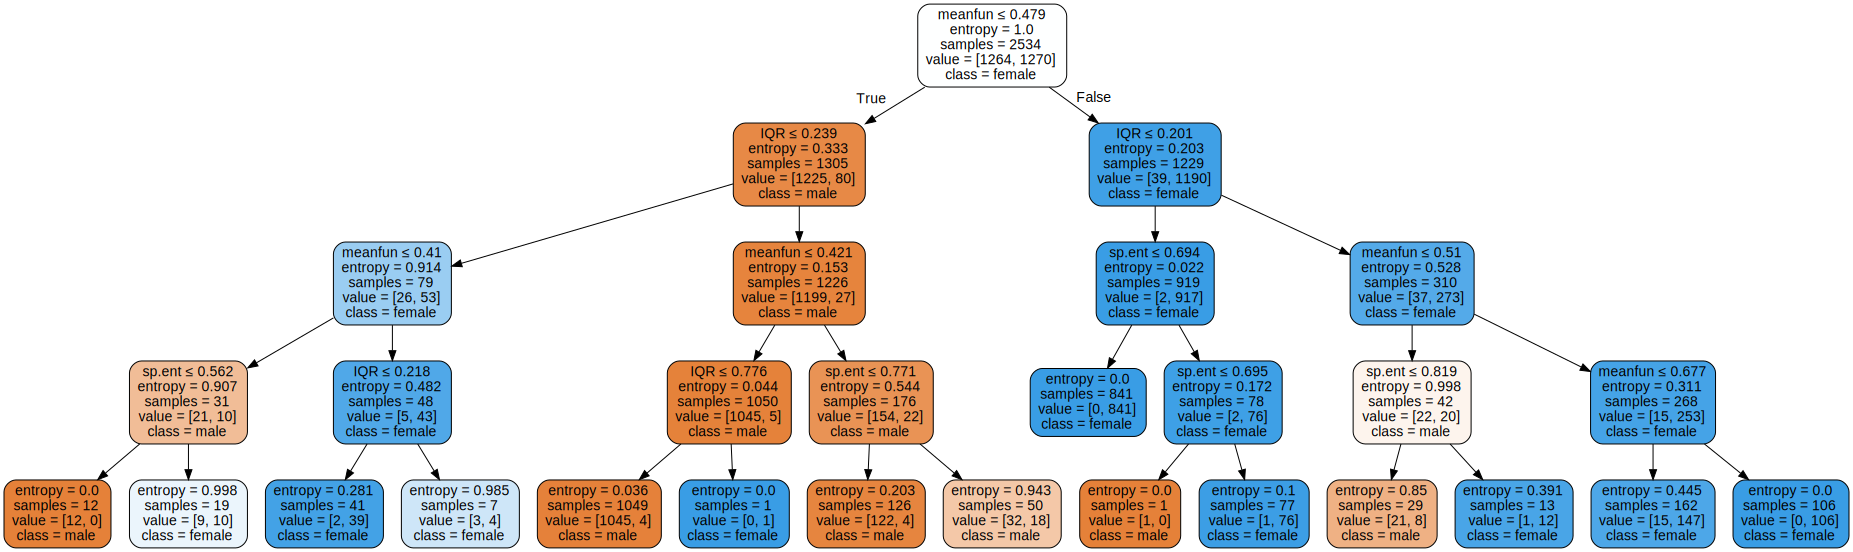

In [ ]:
#Display the decision tree
graph=graphviz.Source(dot_data)
graph

In [ ]:
new_df.sort_values('label')

,Q25,meanfun,IQR,sp.ent,label,gender_val
3167,0.283,0.714,0.699,0.823,female,1
2105,0.712,0.670,0.026,0.198,female,1
2106,0.733,0.696,0.055,0.428,female,1
2107,0.725,0.709,0.042,0.353,female,1
2108,0.702,0.636,0.071,0.400,female,1
...,...,...,...,...,...,...
1058,0.533,0.384,0.454,0.729,male,0
1059,0.538,0.376,0.373,0.700,male,0
1060,0.539,0.430,0.356,0.676,male,0
1062,0.553,0.356,0.418,0.735,male,0


##Fuzzy Logic

In [ ]:
Q25 = ctrl.Antecedent(np.arange(0,1,0.001),'Q25')
meanfun = ctrl.Antecedent(np.arange(0,1,0.001),'meanfun')
IQR = ctrl.Antecedent(np.arange(0,1,0.001),'IQR')
sp_ent = ctrl.Antecedent(np.arange(0,1,0.001),'sp_ent')
gender_val = ctrl.Consequent(np.arange(0,1.001,0.001),'gender_val')


In [ ]:
Q25.automf(7) #as Q25 is required only 2 times in decision tree Q25 ≤ 0.104 and Q25 ≤ 0.855
meanfun.automf(7) # as meanfun is required 5 times in tree meanfun ≤ 0.479 meanfun ≤ 0.528 meanfun ≤ 0.678 meanfun ≤ 0.432 meanfun ≤ 0.406
IQR.automf(7)
sp_ent.automf(7)



In [ ]:
gender_val['male']= fuzz.trimf(gender_val.universe,[-0.5,0,0.5])
gender_val['female']=fuzz.trimf(gender_val.universe,[0.5,1,1.5])

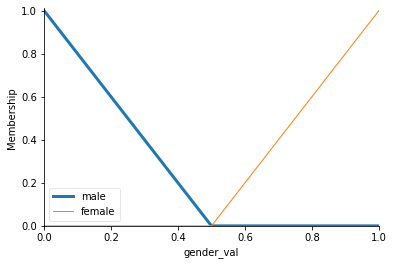

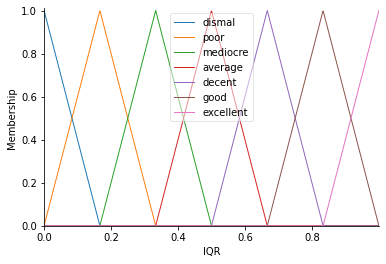

In [ ]:
gender_val['male'].view()
IQR.view()
#dismal = 0.143
#poor = 0.286
#mediocre = 0.429
#average = 0.572
#decent = 0.715
#good = 0.858
#excellent = 1

###Fuzzy rules

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb224750d0>)

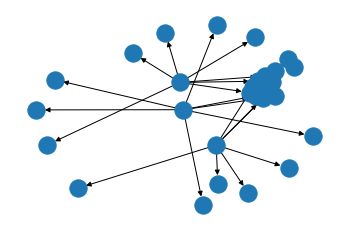

In [ ]:
rule1 = ctrl.Rule((IQR['poor']|IQR['dismal']) & (meanfun['mediocre']|meanfun['poor'] |meanfun['dismal']) & (sp_ent['decent']|sp_ent['good']|sp_ent['excellent'])  , gender_val['female'])
rule1.view()


In [ ]:
rule2 = ctrl.Rule((IQR['poor']|IQR['dismal']) & (meanfun['mediocre']|meanfun['poor'] |meanfun['dismal']) &(sp_ent['average']|sp_ent['poor']|sp_ent['mediocre']|sp_ent['dismal']) , gender_val['male'])

In [ ]:
rule3 = ctrl.Rule((IQR['poor']|IQR['dismal']) & (meanfun['mediocre']) &(sp_ent['average']|sp_ent['mediocre']) , gender_val['male'])

In [ ]:
rule4 = ctrl.Rule((IQR['poor']) & (meanfun['average']|meanfun['decent']|meanfun['good']|meanfun['excellent']) &(sp_ent['average']|sp_ent['mediocre']) , gender_val['female'])

In [ ]:
rule5 = ctrl.Rule((meanfun['mediocre']|meanfun['poor'] |meanfun['dismal']|meanfun['average'])&(sp_ent['average']|sp_ent['poor']|sp_ent['mediocre']|sp_ent['dismal']|sp_ent['decent']),gender_val['male'])

In [ ]:
rule6 = ctrl.Rule((meanfun['mediocre']|meanfun['poor'] |meanfun['dismal']|meanfun['average'])&(sp_ent['good']|sp_ent['excellent'])&(IQR['average']|IQR['poor']|IQR['mediocre']|IQR['dismal']),gender_val['female'])

In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
labelling_control=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
labelling = ctrl.ControlSystemSimulation(labelling_control)

In [ ]:
#Output fuzzy graph for given input data
from random import seed
from random import randint

value = randint(1,len(x_test))
df_value = x_test.index[value]

labelling.input['sp_ent'] = x_test['sp.ent'].iloc[value]
labelling.input['IQR']  = x_test['IQR'].iloc[value]
labelling.input['meanfun']  = x_test['meanfun'].iloc[value]
labelling.compute()


0.810018092626784


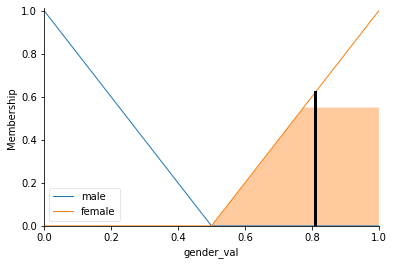

In [ ]:
print (labelling.output['gender_val'])
gender_val.view(sim=labelling)

In [ ]:
#for verification

new_df['label'].iloc[df_value]

'male'